# Ham or Spam

<font color=green> In this project, we will develop a  classificaiton model to determine whether the messages sent to Turkcell are spam or not.

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv("spam.csv", encoding="iso-8859-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
import neattext as nt

In [7]:
df.drop(["Unnamed: 2"	,"Unnamed: 3",	"Unnamed: 4"], axis= 1, inplace= True)  
# these columns were deleted as they are not needed

In [8]:
df.columns= ["class","text"]
# the column names were changed 

In [9]:
all= ''.join(df["text"])
# all columns in the text column were merged
all

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sU dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R enti

In [10]:
sent= nt.TextFrame(all)

In [11]:
sent.describe()

Key      Value          
Length  : 446422         
vowels  : 123893         
consonants: 203282         
stopwords: 33669          
punctuations: 22903          
special_char: 23446          
tokens(whitespace): 80954          
tokens(words): 87947          


In [12]:
df.shape

(5572, 2)

In [13]:
sent.length

446422

In [14]:
sent.head(20)

'Go until jurong poin'

In [15]:
sent.tail(30)

'freeRofl. Its true to its name'

In [16]:
sent.count_vowels()

{'a': 25248, 'e': 34934, 'i': 22439, 'o': 28962, 'u': 12310}

In [17]:
# find stop words
sent.count_stopwords()

{'go': 258,
 'until': 26,
 'only': 161,
 'in': 837,
 'there': 119,
 'a': 1401,
 'to': 2220,
 'may': 39,
 'say': 74,
 'so': 376,
 'already': 43,
 'then': 172,
 'i': 1814,
 "don't": 125,
 'he': 159,
 'around': 46,
 'here': 64,
 "it's": 82,
 'been': 126,
 'now': 214,
 'and': 944,
 'no': 172,
 'some': 115,
 'you': 1763,
 'up': 242,
 'for': 680,
 'it': 437,
 'my': 712,
 'is': 836,
 'not': 374,
 'with': 373,
 'they': 111,
 'me': 573,
 'per': 56,
 'your': 649,
 'has': 115,
 'as': 153,
 'all': 246,
 'have': 545,
 'call': 530,
 'or': 405,
 'the': 1282,
 'on': 511,
 'be': 373,
 'about': 153,
 'this': 285,
 'enough': 21,
 'from': 271,
 'won': 64,
 'our': 135,
 'take': 118,
 'will': 362,
 'at': 379,
 'next': 58,
 'how': 192,
 'his': 55,
 'make': 99,
 'if': 342,
 'its': 175,
 'that': 439,
 'first': 47,
 'when': 261,
 'down': 45,
 'can': 350,
 'myself': 8,
 'really': 77,
 'always': 53,
 'are': 446,
 'an': 111,
 'did': 93,
 'over': 50,
 'do': 315,
 'back': 115,
 'what': 193,
 'does': 25,
 'still': 14

In [18]:
sent.count_consonants()

{'b': 5310,
 'c': 8876,
 'd': 11275,
 'f': 5745,
 'g': 8284,
 'h': 14204,
 'j': 935,
 'k': 4533,
 'l': 15757,
 'm': 10573,
 'n': 21738,
 'p': 6811,
 'q': 236,
 'r': 17738,
 's': 18898,
 't': 27921,
 'v': 3504,
 'w': 8462,
 'x': 1586,
 'y': 10396,
 'z': 500}

In [19]:
sent.readability()
# checking the readability score of the text in"sent"

{'automated readability': 8.087364326125986,
 'description': '13-14 years (Eighth Grade)'}

In [20]:
import nltk   #natural language toolkit

In [21]:
# first the data prepared appropriately
df["text"] = df["text"].str.lower()
df["text"] = df["text"].str.replace(r"[^\w\s]", "", regex=True)  # Remove punctuation
df["text"] = df["text"].str.replace(r"\d+", "", regex=True)     # Remove numbers
df["text"] = df["text"].str.replace(r"\n", "", regex=True)      # Remove newlines
df["text"] = df["text"].str.replace(r"\r", "", regex=True)      # Remove carriage returns

In [22]:
x=df["text"]
y=df["class"]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

+ CountVectorizer: Metin verilerini kelime sıklıklarına (word counts) göre vektörlere dönüştürür. Her kelimenin belgedeki kaç defa geçtiğini sayar.
+ TfidfVectorizer: Metin verilerini TF-IDF (Term Frequency-Inverse Document Frequency) kullanarak dönüştürür. Bu yöntem, kelime sıklıklarını normalize eder ve sık geçen yaygın kelimelerin ağırlığını düşürür, böylece önemli kelimelere daha fazla ağırlık verir.

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.pipeline import Pipeline

+ Pipeline` is a tool in scikit-learn that allows sequential execution of multiple data processing steps. It simplifies workflows by linking data transformations (like vectorization) with a machine learning model in one unified process.


In [28]:
# create a pipeline with TF-IDF vectorizer and Random Forest classifier
clf = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier())])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.20, random_state=42)

In [31]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [32]:
y_pred= clf.predict(x_test)

In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [34]:
accuracy_score(y_test,y_pred)

0.9695067264573991

In [35]:
confusion_matrix(y_test,y_pred)

array([[965,   0],
       [ 34, 116]], dtype=int64)

In [36]:
from sklearn.svm import SVC

In [37]:
svm= Pipeline([("tfidf", TfidfVectorizer()), ("classifier", SVC())])

In [38]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', SVC())])

In [39]:
y_pred= svm.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred)

0.979372197309417

In [41]:
confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 23, 127]], dtype=int64)

In [43]:
import seaborn as sns

<Axes: >

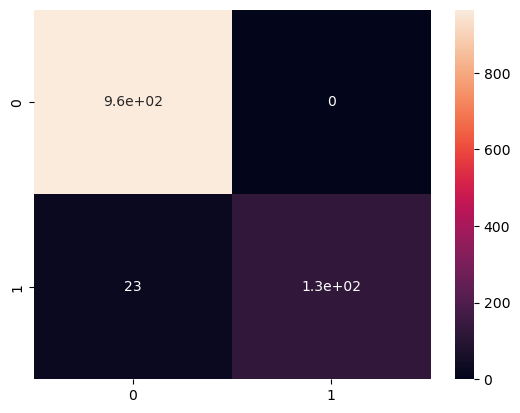

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [49]:
test1= ["Hello,you are learning natural langueage processing."]
test2= ["Congratulations, you won a lottary ticket. To claim call 539-503-68-69."]
test3= ["Click here to claim your $1million."] 

In [51]:
print(clf.predict(test1))
print(clf.predict(test2))
print(clf.predict(test3))
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['spam']
['ham']
['ham']
['spam']
['spam']


In [53]:
ham= df[df["class"]== "ham"]
spam= df[df["class"]== "spam"]

In [55]:
# data augmentation= var olan datadan yeni data oluşturma
# oluşturlan data = synthetic data

In [57]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [58]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def wc(data,color):
    plt.figure(figsize=(10,10))
    wc= WordCloud(background_color= color, stopwords= STOPWORDS)
    wc.generate("".join(data))
    plt.imshow(wc)
    plt.axis("off")

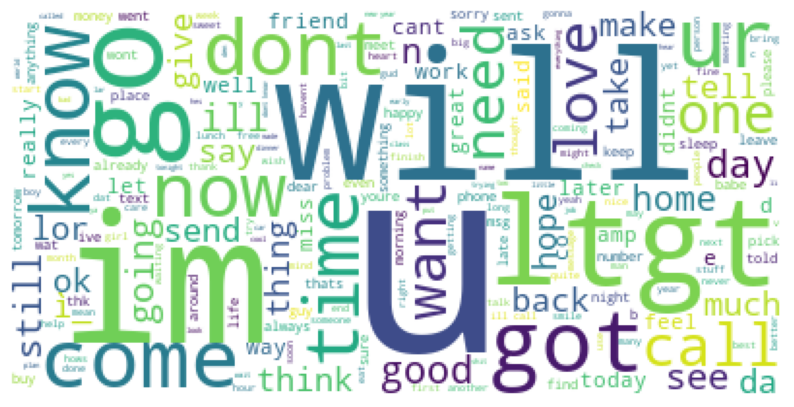

In [63]:
wc(ham["text"], "white")

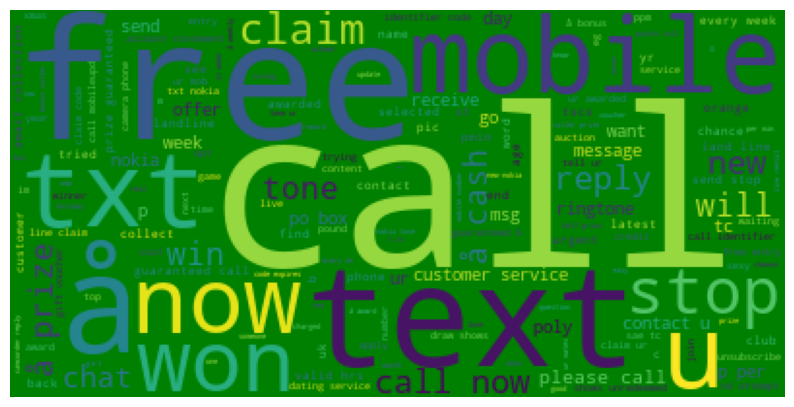

In [65]:
wc(spam["text"], "green")

C:\Users\zeyil\AppData\Local\Temp\ipykernel_1960\3745453803.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["class"], palette="viridis" );


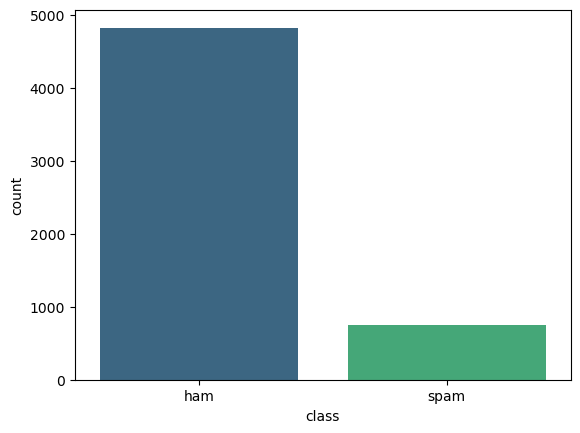

In [71]:
sns.countplot(x= df["class"], palette="viridis" );

+ imbalanced Dataset

In [74]:
df["class"].value_counts()
# there is no balance

class
ham     4825
spam     747
Name: count, dtype: int64

In [76]:
spam= spam.sample(ham.shape[0], replace=True)  # synthetic data
ham.shape, spam.shape
# balanced

((4825, 2), (4825, 2))

In [78]:
data= pd.concat([ham,spam], ignore_index= True)

C:\Users\zeyil\AppData\Local\Temp\ipykernel_1960\1801119855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["class"], palette="viridis" );


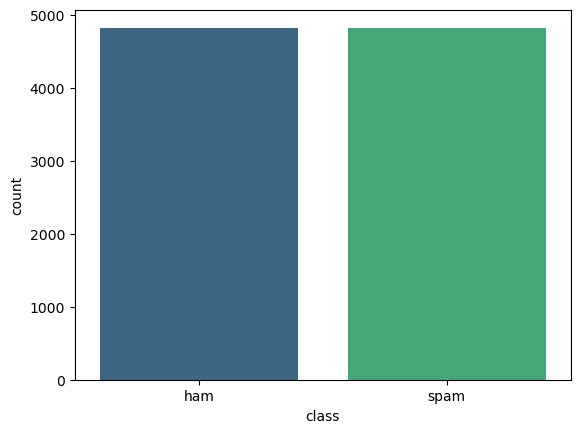

In [80]:
sns.countplot(x= data["class"], palette="viridis" );

In [82]:
x_train, x_test, y_train, y_test= train_test_split(data["text"], data["class"],test_size=.20, random_state=42)

In [84]:
clf = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier())])

In [86]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [89]:
y_pred= clf.predict(x_test)

In [91]:
accuracy_score(y_test, y_pred)

0.9984455958549223

In [93]:
# Sentiment Analysis = poisitve , negative or notr 

In [95]:
from textblob import TextBlob

In [107]:
text= "Zeynep loves hard working"

In [109]:
blob= TextBlob(text)

In [111]:
blob.sentiment

Sentiment(polarity=-0.2916666666666667, subjectivity=0.5416666666666666)

In [162]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [181]:
!pip install -U spacy
!pip install -U pydantic

     ---------------------------------------- 0.0/147.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/147.0 kB ? eta -:--:--
     ------- ----------------------------- 30.7/147.0 kB 325.1 kB/s eta 0:00:01
     --------------- --------------------- 61.4/147.0 kB 544.7 kB/s eta 0:00:01
     -----------------------------------  143.4/147.0 kB 944.1 kB/s eta 0:00:01
     ------------------------------------ 147.0/147.0 kB 876.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/434.4 kB ? eta -:--:--
   -------------- ------------------------- 153.6/434.4 kB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 409.6/434.4 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 434.4/434.4 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ------- -------------------------------- 0.4/1.9 MB 11.6 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.9 MB 9.2 MB/s eta 0:00:01


In [182]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     --------------------------------------- 0.0/42.8 MB 325.1 kB/s eta 0:02:12
     --------------------------------------- 0.1/42.8 MB 762.6 kB/s eta 0:00:56
     ---------------------------------------- 0.2/42.8 MB 1.1 MB/s eta 0:00:40
     ---------------------------------------- 0.3/42.8 MB 1.7 MB/s eta 0:00:26
      --------------------------------------- 0.6/42.8 MB 2.3 MB/s eta 0:00:19
      --------------------------------------- 0.9/42.8 MB 3.3 MB/s eta 0:00:13
      --------------------------------------- 0.9/42.8 MB 3.3 MB/s eta 0:00:13
     - -------------------------------------- 1.9/42.8 MB 5.1 MB/s eta 0:00:09
     - -------------------------------------- 2.0/42.8 MB 4.7 MB/s eta 0:00:09
     -- ------------------------------------- 2.4/42.8 MB 5.1 MB/s eta 0:00:08
     -- ------------------------------------- 2.9/42.8 MB 5.6 MB

In [190]:
import spacy

+ tokenization
+ named entity recogniton 
+ topic modelling 
+ POS tagging
+ Lemma Stemma

In [192]:
nlp=  spacy.load(name= "en_core_web_md")

In [194]:
s1= """ If the time has come to set sail from time itself, 
A ship departs from this port, heading into the unknown.

It embarks quietly, as if there were no passengers; 
At its departure, no hand waves, no handkerchief flutters.

Those left on the dock are filled with sorrow for this voyage, 
For days their teary eyes gaze at the dark horizon."""

In [200]:
doc1= nlp(s1)

In [202]:
for token in doc1:
    print(token)
#  2. option
# [x for x in doc1]

 
If
the
time
has
come
to
set
sail
from
time
itself
,


A
ship
departs
from
this
port
,
heading
into
the
unknown
.



It
embarks
quietly
,
as
if
there
were
no
passengers
;


At
its
departure
,
no
hand
waves
,
no
handkerchief
flutters
.



Those
left
on
the
dock
are
filled
with
sorrow
for
this
voyage
,


For
days
their
teary
eyes
gaze
at
the
dark
horizon
.


In [204]:
s1= [x for x in doc1]
[x.lemma_ for x in s1]

[' ',
 'if',
 'the',
 'time',
 'have',
 'come',
 'to',
 'set',
 'sail',
 'from',
 'time',
 'itself',
 ',',
 '\n',
 'a',
 'ship',
 'depart',
 'from',
 'this',
 'port',
 ',',
 'head',
 'into',
 'the',
 'unknown',
 '.',
 '\n\n',
 'it',
 'embark',
 'quietly',
 ',',
 'as',
 'if',
 'there',
 'be',
 'no',
 'passenger',
 ';',
 '\n',
 'at',
 'its',
 'departure',
 ',',
 'no',
 'hand',
 'wave',
 ',',
 'no',
 'handkerchief',
 'flutter',
 '.',
 '\n\n',
 'those',
 'leave',
 'on',
 'the',
 'dock',
 'be',
 'fill',
 'with',
 'sorrow',
 'for',
 'this',
 'voyage',
 ',',
 '\n',
 'for',
 'day',
 'their',
 'teary',
 'eye',
 'gaze',
 'at',
 'the',
 'dark',
 'horizon',
 '.']

In [214]:
doc= nlp("apple is looking at buying U.K. startup for $1 billion")

In [216]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_ )

apple apple NOUN NN
is be AUX VBZ
looking look VERB VBG
at at ADP IN
buying buy VERB VBG
U.K. U.K. PROPN NNP
startup startup NOUN NN
for for ADP IN
$ $ SYM $
1 1 NUM CD
billion billion NUM CD


In [206]:
from spacy import displacy

In [218]:
displacy.render(doc,style= "dep")

In [220]:
# named entity recognition NER

In [242]:
text= "The curious Jennifer cat wandered through  2024 the sunny garden, chasing butterflies, birds, and shadows, while the wind gently blew."

In [244]:
doc= nlp(text)

In [246]:
displacy.render(doc,style="ent")